In [1]:
from src.document_db import DocumentsDB

db = DocumentsDB()

[nltk_data] Downloading package stopwords to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np

random_index = np.random.randint(0, 99)
similar_documents = db.get_similar_documents(random_index, 5, print_results=True)

[np.float64(0.03631445091303905), np.float64(0.02229884929270311), np.float64(0.021516196301773514), np.float64(0.021463162325585684), np.float64(0.018205554535566562)]


In [3]:
speed_info = db.get_speed_statistics()
speed_info.print_statistics()

Data load speed: 0.00830 seconds
Data preprocessing speed: 3.00578 seconds
TF-IDF matrix build speed: 0.07130 seconds
Inverted index build speed: 0.00000 seconds
Search process speed: 0.00239 seconds


In [4]:
random_index = np.random.randint(0, 99)
dataset_size = []
load_speed = []
preprocess_speed = []
matrix_build_speed = []
inverted_index_build_speed = []
sequential_search_speed = []
memory_usage = []
for i in range(100, 2001, 100):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv")
    similar_documents = db.get_similar_documents(random_index, 5)
    speed_info = db.get_speed_statistics()
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    sequential_search_speed.append(speed_info.search_speed)
    matrix_memory, inverted_index_memory = db.get_memory_usage()
    memory_usage.append(matrix_memory)

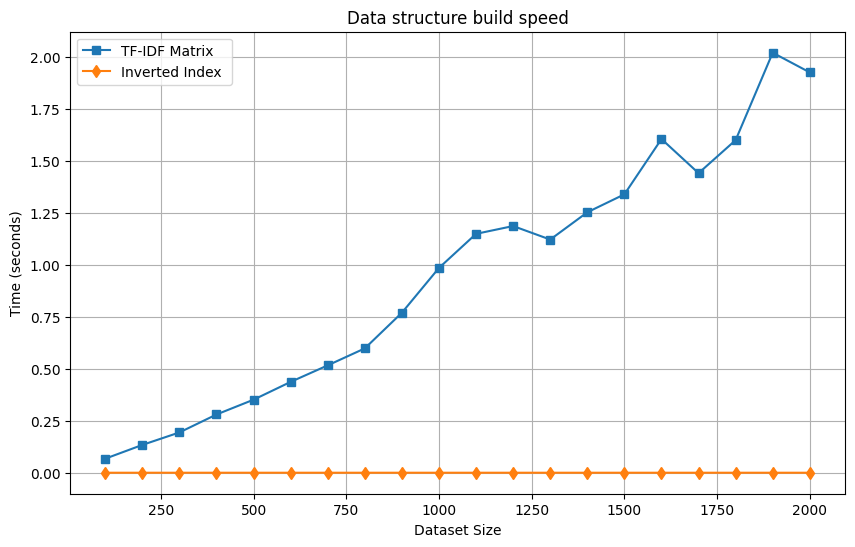

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_size, matrix_build_speed, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_index_build_speed, label="Inverted Index ", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Data structure build speed")
plt.legend()
plt.grid(True)

plt.show()

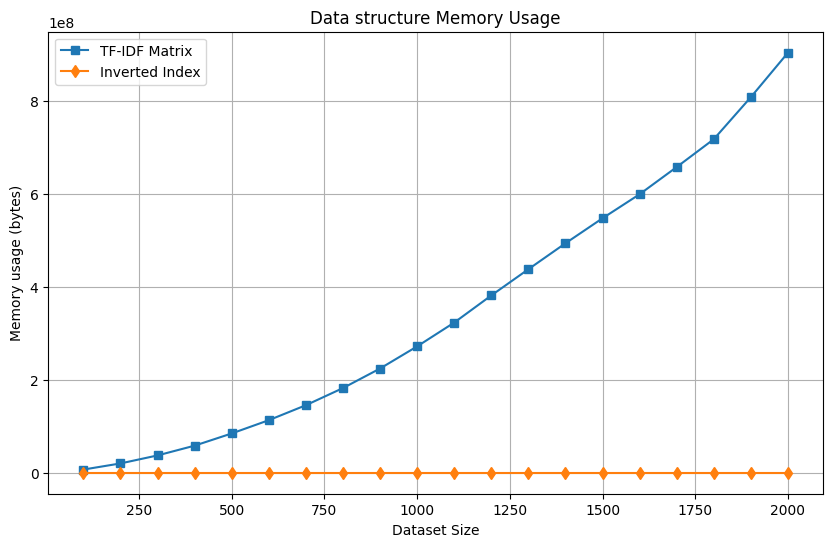

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, memory_usage, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, [0 for i in range(len(dataset_size))], label="Inverted Index", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Memory usage (bytes)")
plt.title("Data structure Memory Usage")
plt.legend()
plt.grid(True)

plt.show()

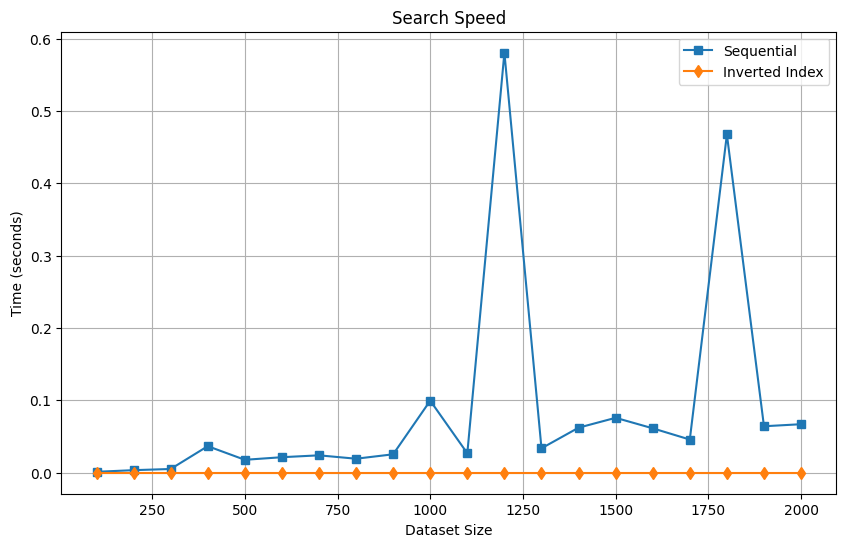

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, sequential_search_speed, label="Sequential", marker="s")
plt.plot(dataset_size, [0 for i in range(len(dataset_size))], label="Inverted Index", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Search Speed")
plt.legend()
plt.grid(True)

plt.show()

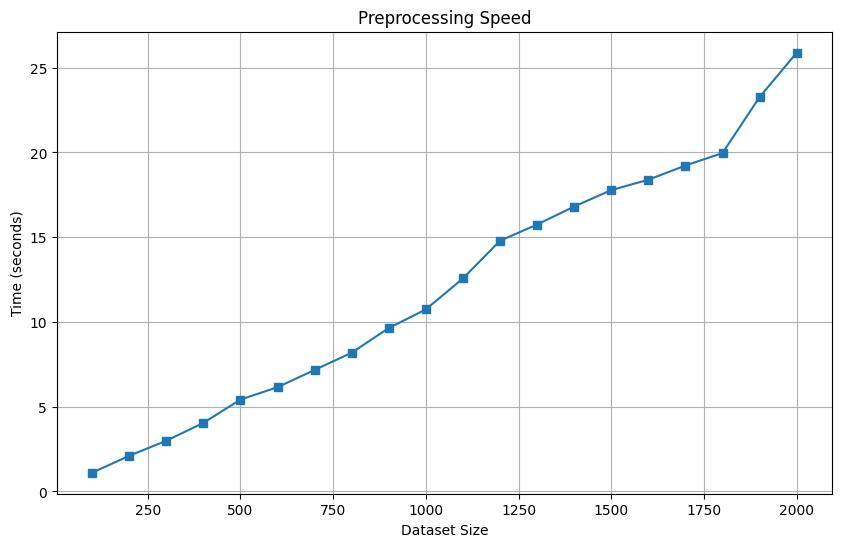

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, preprocess_speed, label="Preprocessing Speed", marker="s")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Preprocessing Speed")
plt.grid(True)

plt.show()